In [1]:
from scipy.sparse import load_npz
import numpy as np
from auxiliarymethods import  datasets as dp 
import auxiliarymethods.auxiliary_methods as aux
from matplotlib import pyplot as plt
from auxiliarymethods import reader
from sources import graph_analysis,clustering,visualisation

TEST TEST TEST


In [2]:
# utility functions

def load_csv(path):
    return np.loadtxt(path, delimiter=";")

def load_sparse(path):
    return load_npz(path)

def select_from_list(l, indices):
    return [l[i] for i in indices]

In [3]:
#base_path = os.path.join("graph_representations", "without_labels")

ds_name = "IMDB-BINARY"
classes = dp.get_dataset(ds_name)


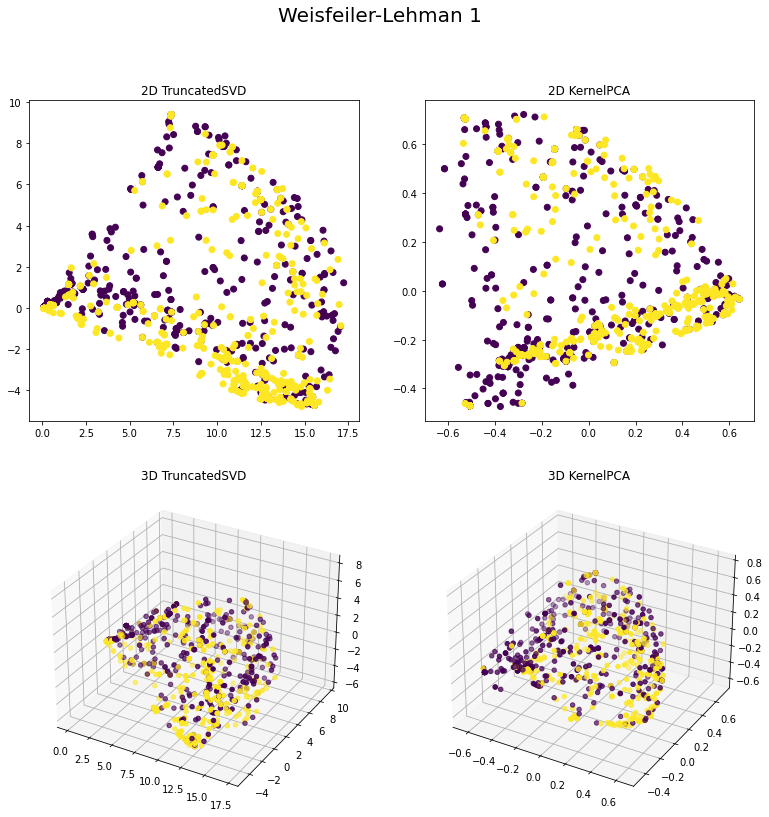

________________________________________________________________________________________


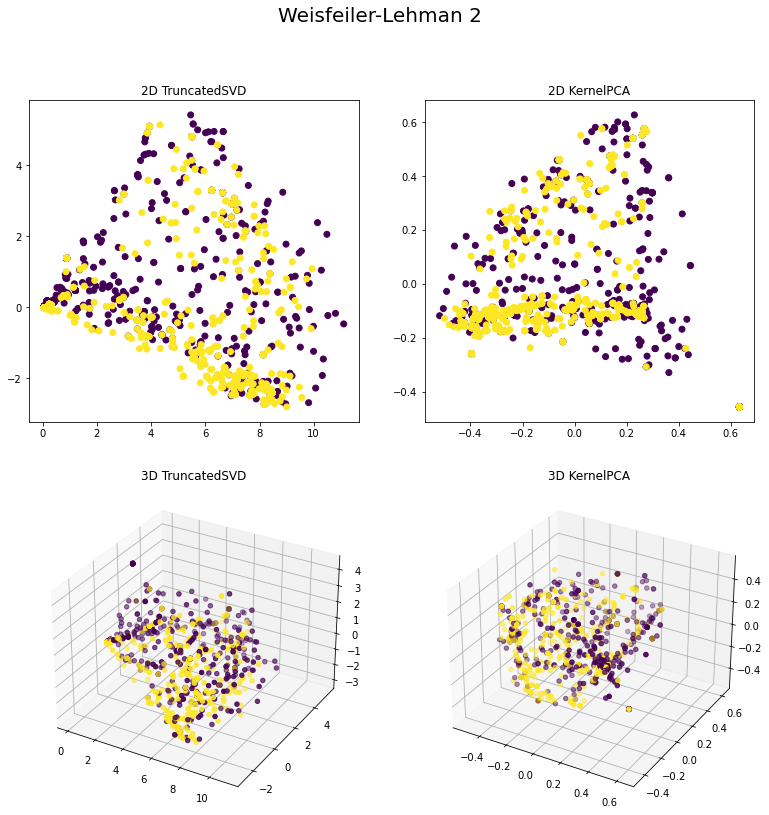

________________________________________________________________________________________


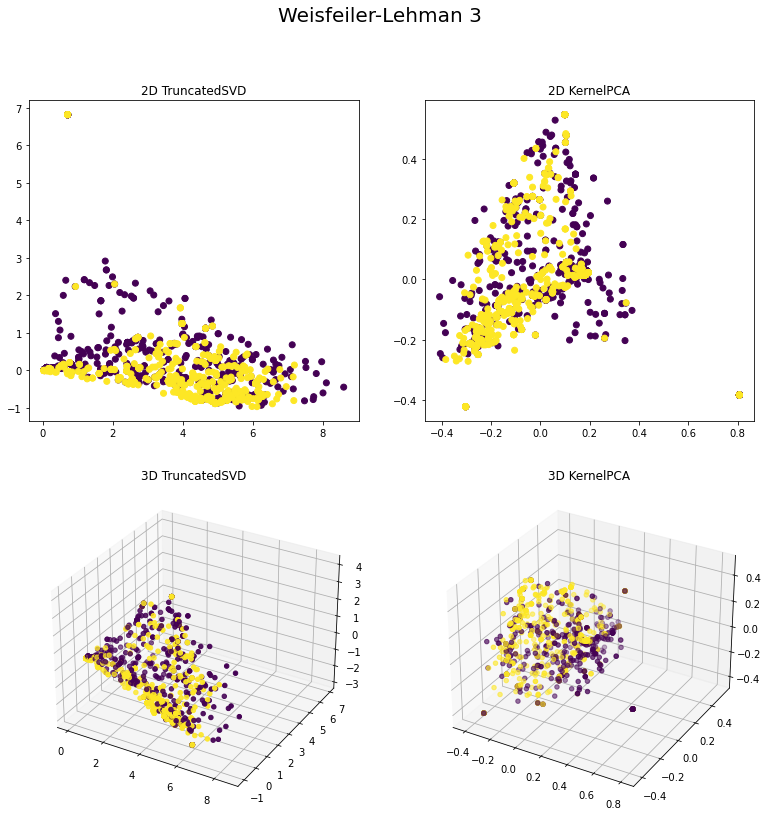

________________________________________________________________________________________


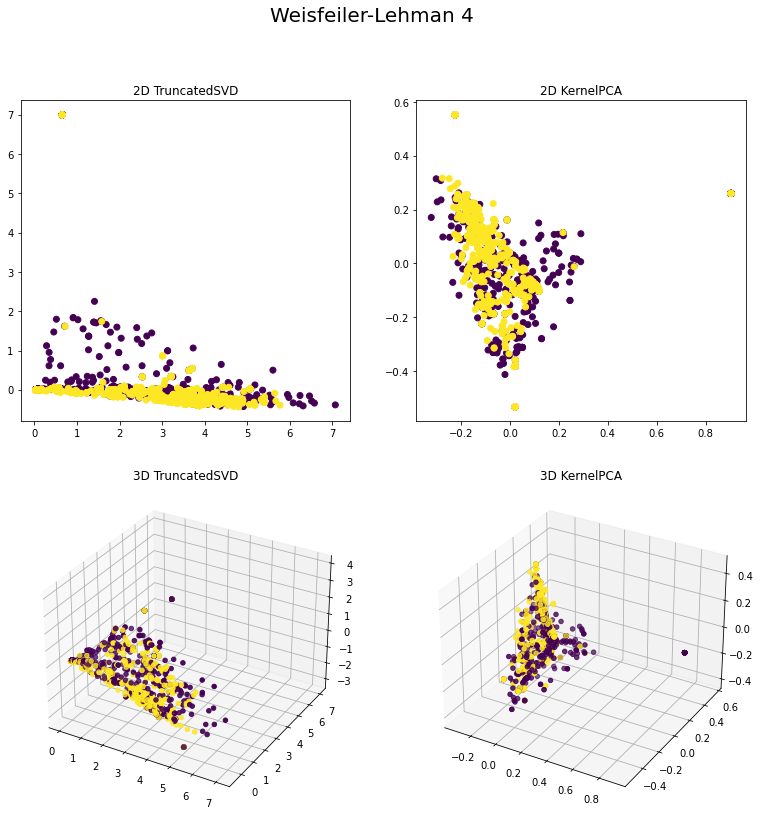

________________________________________________________________________________________


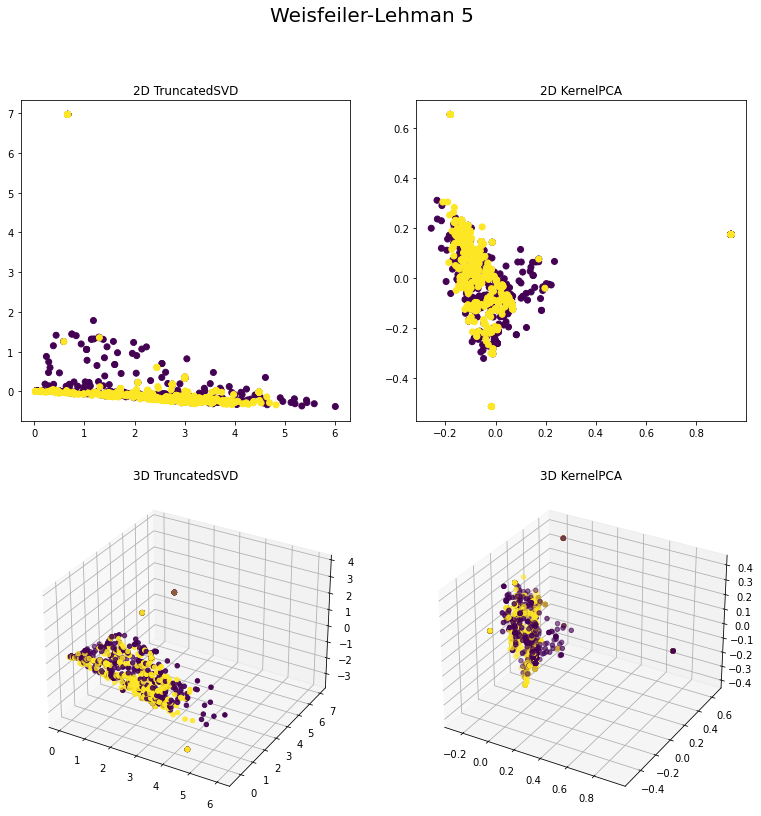

________________________________________________________________________________________


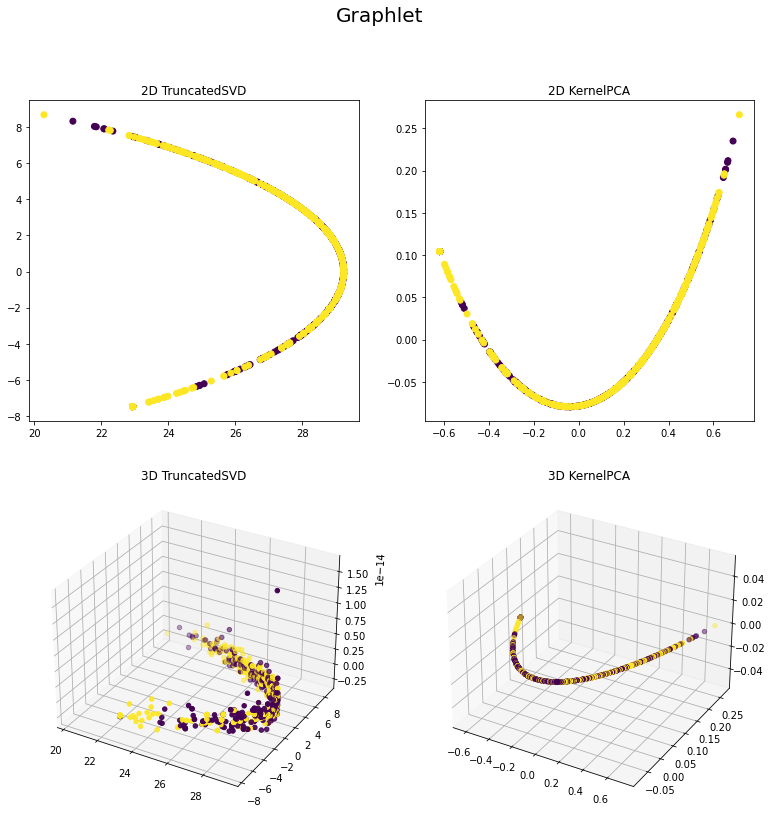

________________________________________________________________________________________


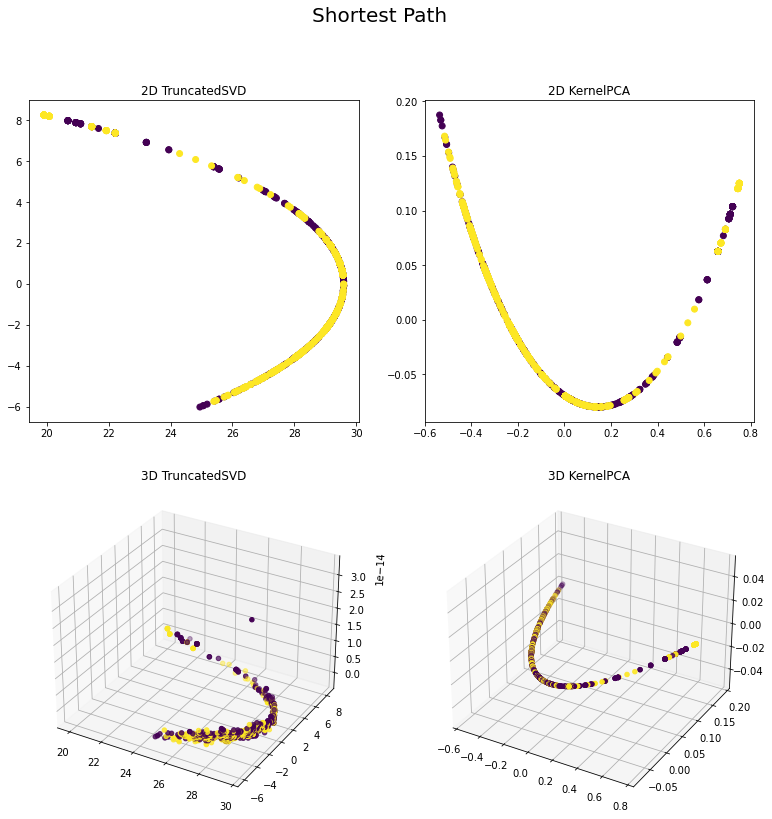

________________________________________________________________________________________


In [4]:
for i in range(1,8):
    if(i==6):
        gram_wl = load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_graphlet.csv")
    elif(i==7):
        gram_wl = load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_shortestpath.csv")
    else:
        gram_wl = load_csv(f"../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl{i}.csv")
    gram_wl = aux.normalize_gram_matrix(gram_wl)
    data_wl_svd = visualisation.truncatedSVD(gram_wl,classes,f"TruncatedSVD on WL{i}")
    data_wl_kpca = visualisation.kernelPCA(gram_wl,classes,f"KernelPCA on WL{i}")
    fig = plt.figure(figsize=(13,13))
    if(i==6):
        fig.suptitle('Graphlet',fontsize=20)
    elif(i==7):
        fig.suptitle('Shortest Path',fontsize=20)
    else:
        fig.suptitle(f'Weisfeiler-Lehman {i}',fontsize=20)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223,projection='3d')
    ax4 = fig.add_subplot(224,projection='3d')
    ax1.title.set_text('2D TruncatedSVD')
    ax2.title.set_text('2D KernelPCA')
    ax3.title.set_text('3D TruncatedSVD')
    ax4.title.set_text('3D KernelPCA')
    ax1.scatter(data_wl_svd[:,0],data_wl_svd[:,1],c=classes)
    ax2.scatter(data_wl_kpca[:,0],data_wl_kpca[:,1],c=classes)
    ax3.scatter3D(data_wl_svd[:,0],data_wl_svd[:,1],data_wl_svd[:,2],c=classes)
    ax4.scatter3D(data_wl_kpca[:,0],data_wl_kpca[:,1],data_wl_kpca[:,2],c=classes)
    plt.show()
    print("________________________________________________________________________________________")


Was fällt auf ? 
Wl1 ist im Vergleich zu WL2-5 90° rotiert. Außerdem wird mit zunehmender Weisfeiler-lemann Iteration die Variation der Datenpunkte entlang der x bzw. y-Achse kleiner. 

In [4]:
imdb_networkx = reader.tud_to_networkx(ds_name)
print(f"Number of graphs in data set is {len(imdb_networkx)}")


Number of graphs in data set is 1000


In [5]:
print(f'The average number of nodes in the {ds_name} dataset is:  ',graph_analysis.getAverageNumberOfNodes(imdb_networkx))

The average number of nodes in the IMDB-BINARY dataset is:   19.773


In [6]:
print(f'The average number of edges in the {ds_name} dataset is:  ',graph_analysis.getAverageNumberOfEdges(imdb_networkx))
print(f'The average number of edges per node in the {ds_name} dataset is:  ',graph_analysis.getAverageNumberOfEdgesPerNode(imdb_networkx))
print(f'The average density in the {ds_name} dataset is:  ',graph_analysis.getDensity(imdb_networkx))

The average number of edges in the IMDB-BINARY dataset is:   96.531
The average number of edges per node in the IMDB-BINARY dataset is:   4.8819602488241545
The average density in the IMDB-BINARY dataset is:   0.5206179238965227


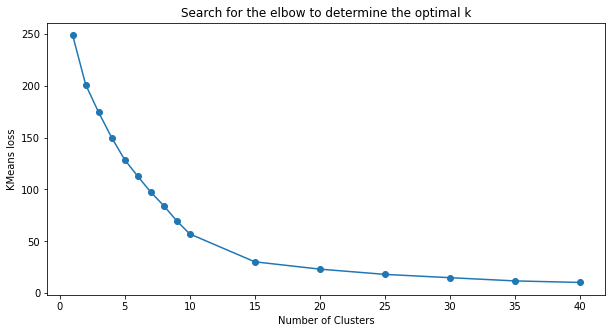

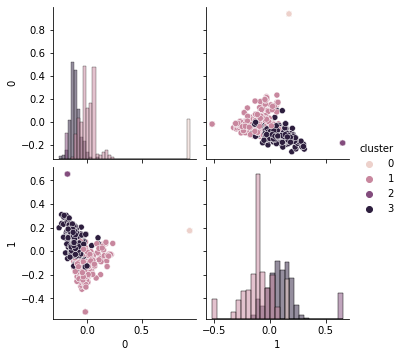

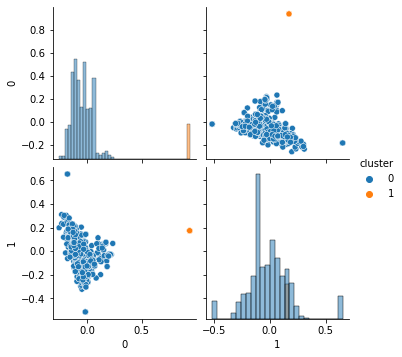

In [5]:
gram_wl = load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl5.csv")
gram_wl = aux.normalize_gram_matrix(gram_wl) 
kpca = visualisation.kernelPCA(gram_wl,classes,'test')
clustering.kMeans_scree_plot(kpca)